## 1.Q型聚类分析: 对样本进行分类
1. 样本相似性度量  
Mahalanobis距离(马氏距离). 对一切线性变换均不变.
2. 类间相似性度量  
最短/长距离法, 重心法, 类平均法, 离差平方和法(Ward方法)
3. 聚类图(树形图/树状图)  
聚类图怎么看: https://jingyan.baidu.com/article/29697b9109d147ab21de3c44.html.

## 2.R型聚类分析: 对变量进行分类
1. 变量相似性度量  
应满足: I.相关系数 <= 1; II.具有交换性; III.越接近1表示越相似
    - 相关系数及相关系数矩阵  
    - 夹角余弦

2. 变量聚类法(224页): 列出相关系数矩阵后,可以使用聚类图的方法直观表示.
    - 最长距离法
    - 最短距离法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [1.0, 3.0, 3.0, 2.0],
  [0.0, 4.0, 4.0, 3.0]],
 'ivl': ['4', '0', '1', '2', '3'],
 'leaves': [4, 0, 1, 2, 3],
 'color_list': ['g', 'r', 'b', 'b']}

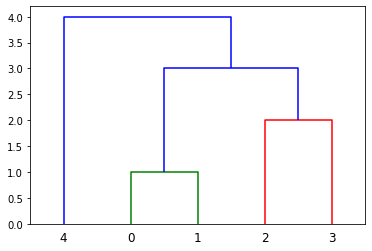

In [3]:
# scikit-learn 没有绘制树状图的功能，需借助 SciPy 库完成
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# method是类间距求法. 'single':以最小距离为间距
# 关于metric的有效值,可参照《数学建模算法与应用（第二版）》的222页
dendrogram(linkage(
    [[1,0],
     [1,1],
     [3,2],
     [4,3],
     [2,5]], method='single', metric='cityblock'))


[ 1.         11.          0.40652755  2.        ]	1.0与11.0聚成类2.0, 高0.4065275519288681
[ 5.         13.          0.85780833  3.        ]	5.0与13.0聚成类3.0, 高0.8578083327495438
[ 0.         12.          0.97563165  2.        ]	0.0与12.0聚成类2.0, 高0.975631650073492
[6.         9.         1.00830799 2.        ]	6.0与9.0聚成类2.0, 高1.0083079879584977
[ 3.         16.          1.61021529  3.        ]	3.0与16.0聚成类3.0, 高1.610215288701898
[ 2.         15.          2.11460258  3.        ]	2.0与15.0聚成类3.0, 高2.114602581526248
[ 4.         14.          2.19814438  4.        ]	4.0与14.0聚成类4.0, 高2.1981443759799824
[ 7.         17.          2.55140319  4.        ]	7.0与17.0聚成类4.0, 高2.551403190505968
[10.         18.          2.66056688  4.        ]	10.0与18.0聚成类4.0, 高2.6605668783953114
[ 8.         20.          3.25828581  5.        ]	8.0与20.0聚成类5.0, 高3.2582858108357935
[21.         22.         21.79812099  9.        ]	21.0与22.0聚成类9.0, 高21.798120991286247
[19.         23.         33.66664764 13.        ]	19.0与23.0聚成

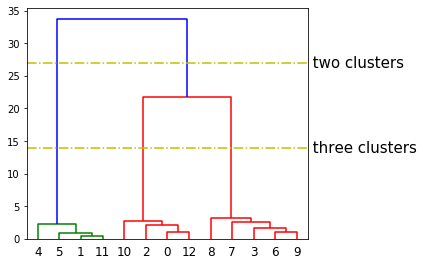

In [4]:
# scikit-learn 没有绘制树状图的功能，需借助 SciPy 库完成
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成模拟数据
X, y = make_blobs(n_samples=13, random_state=42)
# 在数据组 X 上应用 ward 聚类函数，返回聚类过程中所跨越距离的数组
linkage_array = ward(X)
for c in linkage_array:
    print(c, '{}与{}聚成类{}, 高{}'.format(c[0], c[1], c[3], c[2]), sep='\t')
# 绘制树状图
dendrogram(linkage_array)
 
# 标记数中划分为两个和三个簇的位置
ax = plt.gca()
bounds = ax.get_xbound()
plt.plot(bounds, [27, 27], '-.', c='y')
plt.plot(bounds, [14, 14], '-.', c='y')
plt.text(bounds[1], 27, ' two clusters', va='center', fontsize=15)
plt.text(bounds[1], 14, ' three clusters', va='center', fontsize=15)
plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)
 
plt.show()

(610, 2)


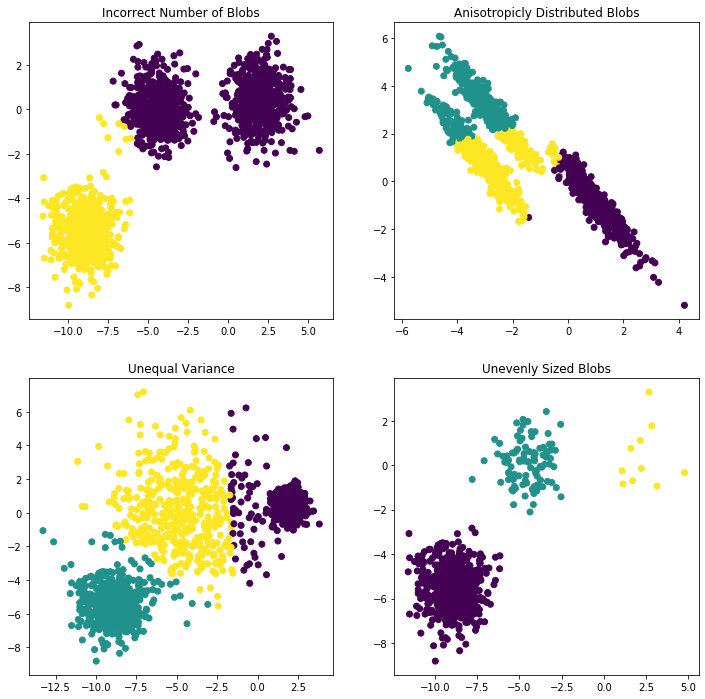

In [6]:
# k-means聚类法示例
# 代码来源: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


[[ 0.10841228  3.85938689 -0.60594057  1.15772199]
 [-0.89131776  0.17067533 -0.49521419  1.07546185]
 [-0.09932383 -0.77564334  0.24168896 -1.06330166]
 [ 2.0040043  -0.47146948 -0.46085083 -0.64484793]
 [-0.1317826  -0.84806569  1.75367678  2.38089444]
 [ 0.50440925 -0.51492289  3.57493482 -1.02038333]
 [ 0.05215042 -0.40387529 -0.64030393 -0.73068459]
 [-0.33302695  0.49416182  0.29132492  0.12768204]
 [ 0.53037626 -0.60182971 -0.03321791  1.22209949]
 [-1.13584047 -0.16246747 -0.33867    -0.71995501]]


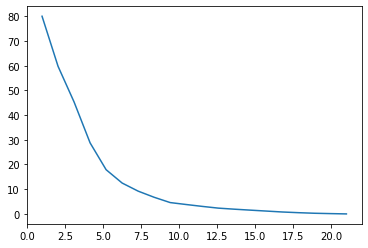

In [33]:
# 15.7中RBF网络确定中心时使用K-means

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = np.loadtxt('15.D 水库年径流与因子特征.txt')
data = preprocessing.scale(data)
trainX = data[:, :-1]
trainY = data[:, -1]

random_state = 170
scores = []
n = 20
for i in range(1, n+1):
    kms = KMeans(n_clusters=i, random_state=None)
    pred = kms.fit_predict(trainX)
    centers = kms.cluster_centers_
    if i == 10:
        print(centers)
    score = 0
    for j in range(trainX.shape[0]):
        score += np.sum(np.square(trainX[j]-centers[pred[j]]))
    scores.append(score)
    

plt.figure()
plt.plot(np.linspace(1, n+1, n), scores)
plt.show()
